# Scott Breitbach
## 23-May-2021
## DSC550, Milestone 4

# Back to Feature Selection:
I found a neat article that helps to compare features using different feature selection methods and thought I'd try it out:
## *How to Throw Away 95% of Your Data and Get 95% Accuracy*
https://towardsdatascience.com/feature-selection-how-to-throw-away-95-of-your-data-and-get-95-accuracy-ad41ca016877

In [1]:
# Load Libraries
import pandas as pd
import numpy as np

# Set random seed
np.random.seed(42)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Load Data

In [2]:
# Load data to a DataFrame
beanDF = pd.read_excel('DryBeanDataset/Dry_Bean_Dataset.xlsx')

In [3]:
# Look at the shape of the DataFrame
beanDF.shape

(13611, 17)

In [4]:
# See the relative numbers of each target category
beanDF.value_counts('Class')

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
dtype: int64

In [5]:
# Get a look at the data
beanDF.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## Split Training and Testing Data

In [6]:
# Load libraries
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
# Set up features target sets
X = beanDF[beanDF.columns[:-1]]
y = beanDF.Class
## TRIAL AND ERROR...
# y = beanDF.Class
# y = pd.get_dummies(beanDF.Class) # Well that didn't work
# y = pd.get_dummies(beanDF, columns=['Class']).iloc[:, -7:] # Still no; wrong shape
# y = beanDF.Class.astype('category') # That didn't work either
# y = y.cat.codes

In [8]:
# Encode the target variables
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, 
                                                    random_state=42)

In [10]:
# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test  = scaler.transform(X_test)

QUESTION: Is it better to fit to the training set (X_train) or the entire feature set (X)?

## Feature selection

### 1. F-statistic

In [11]:
# Feature selection using F-statistic
from sklearn.feature_selection import f_classif
f = f_classif(X_train, y_train)[0]

### 2. Mutual information

In [12]:
# Feature selection using mutual information
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_train, y_train)

### 3. Logistic regression

In [13]:
# Feature selection using logistic regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=500).fit(X_train, y_train)

### LightGBM

In [14]:
# pip install lightgbm

In [15]:
# Feature selection using light gbm
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(
    objective = 'multiclass',
    metric = 'multi_logloss',
    importance_type = 'gain'
).fit(X_train, y_train)

Need to convert y to int maybe? / bag of words?  
Nope! LabelEncoder()  
Note:  
>The previous version of this article used `LabelEncoder` and `LabelBinarizer` which are not the recommended approach for encoding categorical values. These encoders should only be used to encode the target values not the feature values.

>The examples below use `OrdinalEncoder` and `OneHotEncoder` which is the correct approach to use for encoding target values.

From here: https://pbpython.com/categorical-encoding.html

### 5. Boruta

~~Coudn't get this to work. May come back to this later.~~ Works now!

In [16]:
# pip install boruta

In [17]:
# Feature selection using boruta
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
boruta = BorutaPy(
    estimator = RandomForestClassifier(max_depth = 5), 
    n_estimators = 'auto', 
    max_iter = 100
).fit(X_train, y_train)

### 6. MRMR

In [18]:
# pip install git+https://github.com/smazzanti/mrmr

https://towardsdatascience.com/mrmr-explained-exactly-how-you-wished-someone-explained-to-you-9cf4ed27458b

In [19]:
# import patsy

In [20]:
# Feature selection using
import pandas as pd
from mrmr import mrmr_classif
mrmr = mrmr_classif(pd.DataFrame(X_train), pd.Series(y_train), K = 784)

Again, need to convert y str to float

### Store results

In [21]:
# Create DF to store feature ranking info
ranking = pd.DataFrame(index = range(X_train.shape[1]))

# Store ranking info for each feature from each method
ranking['feat'] = X.columns
ranking['f'] = pd.Series(f, index = ranking.index).fillna(0).rank(ascending = False)
ranking['mi'] = pd.Series(mi, index = ranking.index).fillna(0).rank(ascending = False)
ranking['logreg'] = pd.Series(np.abs(logreg.coef_).mean(axis = 0), index = ranking.index).rank(ascending = False)
ranking['lightgbm'] = pd.Series(lgbm.feature_importances_, index = ranking.index).rank(ascending = False)
ranking['boruta'] = boruta.support_* 1 + boruta.support_weak_ * 2 + (1 - boruta.support_ - boruta.support_weak_) * X_train.shape[1]
ranking['mrmr'] = pd.Series(list(range(1, len(mrmr) + 1)) + [X_train.shape[1]] * (X_train.shape[1] - len(mrmr)), index = mrmr + list(set(ranking.index) - set(mrmr))).sort_index()

ranking = ranking.replace(to_replace = ranking.max(), value = X_train.shape[1])
ranking.to_csv('ranking.csv', index = False)

In [22]:
# View rankings by method
ranking

,feat,f,mi,logreg,lightgbm,boruta,mrmr
0,Area,1.0,3.0,10.0,2.0,16,1
1,Perimeter,4.0,1.0,5.0,7.0,16,6
2,MajorAxisLength,6.0,5.0,7.0,5.0,16,8
3,MinorAxisLength,5.0,7.0,2.0,8.0,16,3
4,AspectRation,9.0,11.0,11.0,11.0,16,2
5,Eccentricity,12.0,12.0,12.0,16.0,16,11
6,ConvexArea,2.0,4.0,8.0,4.0,16,4
7,EquivDiameter,3.0,2.0,6.0,14.0,16,5
8,Extent,16.0,16.0,16.0,13.0,16,15
9,Solidity,15.0,15.0,15.0,12.0,16,16


In [23]:
# Sum the rankings across methods
ranking['total'] = ranking.sum(axis=1)
# Sort by sum to get an overall idea of the most/least useful features
ranking.sort_values('total')

,feat,f,mi,logreg,lightgbm,boruta,mrmr,total
0,Area,1.0,3.0,10.0,2.0,16,1,33.0
6,ConvexArea,2.0,4.0,8.0,4.0,16,4,38.0
1,Perimeter,4.0,1.0,5.0,7.0,16,6,39.0
3,MinorAxisLength,5.0,7.0,2.0,8.0,16,3,41.0
7,EquivDiameter,3.0,2.0,6.0,14.0,16,5,46.0
12,ShapeFactor1,8.0,8.0,1.0,3.0,16,10,46.0
2,MajorAxisLength,6.0,5.0,7.0,5.0,16,8,47.0
13,ShapeFactor2,7.0,6.0,3.0,10.0,16,12,54.0
11,Compactness,10.0,9.0,14.0,1.0,16,7,57.0
4,AspectRation,9.0,11.0,11.0,11.0,16,2,60.0


## Plot Feature Importances

In [24]:
# Load libraries
import matplotlib.pyplot as plt

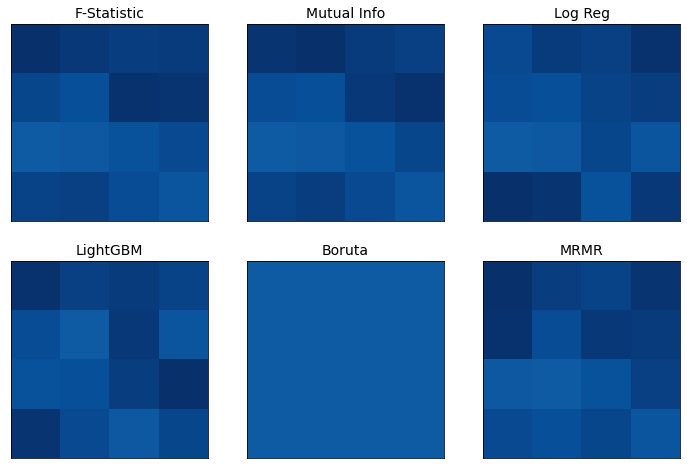

In [25]:
# Plot ranking of each of the 16 features in a 4 x 4 grid
plt_ncols = 3
plt_nrows = 2

fig, axs = plt.subplots(plt_nrows, plt_ncols, figsize = (plt_ncols * 4, plt_nrows * 4))

for e, (algo, title) in enumerate(
    zip(
        ['f', 'mi', 'logreg', 'lightgbm', 'boruta', 'mrmr'],
        ['F-Statistic', 'Mutual Info', 'Log Reg', 'LightGBM', 'Boruta', 'MRMR']
    )):

    a = axs[divmod(e, plt_ncols)].imshow(
        ranking[algo].to_numpy().reshape(4, 4), 
        cmap = 'Blues_r', 
        vmin = ranking.min().min(), 
        vmax = ranking.max().max()
    )
    
    axs[divmod(e, plt_ncols)].set_title(title, fontsize = 14)
    axs[divmod(e, plt_ncols)].set_xticks([])
    axs[divmod(e, plt_ncols)].set_yticks([])
    
fig.savefig('featimpo_heatmap.png', dpi = 300)

## Predictive Performance on Top Features

In [26]:
# pip install catboost

In [27]:
# Load libraries
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [28]:
%%time
# Evaluate accuracy vs features using each feaure selection technique
algos = ['f', 'mi', 'logreg', 'lightgbm', 'mrmr']
ks = [1, 2, 3, 4, 5, 7, 9, 11, 13, 16]

accuracy = pd.DataFrame(index = ks, columns = algos)
roc = pd.DataFrame(index = ks, columns = algos)

for algo in algos:
    
    for k in ks:
    
        cols = ranking[algo].sort_values().head(k).index.to_list()
                
        clf = CatBoostClassifier().fit(
            X_train[:, cols], y_train,
            eval_set = (X_test[:, cols], y_test),
            early_stopping_rounds = 20,
            verbose = False
        )
                
        accuracy.loc[k, algo] = accuracy_score(
            y_true = y_test, y_pred = clf.predict(X_test[:, cols]))
        roc.loc[k, algo] = roc_auc_score(
            y_true = y_test, y_score = clf.predict_proba(X_test[:, cols]), multi_class = 'ovr', average = 'macro')
        
accuracy.to_csv('accuracy.csv', index = True)
roc.to_csv('roc.csv', index = True)

Wall time: 7min 37s


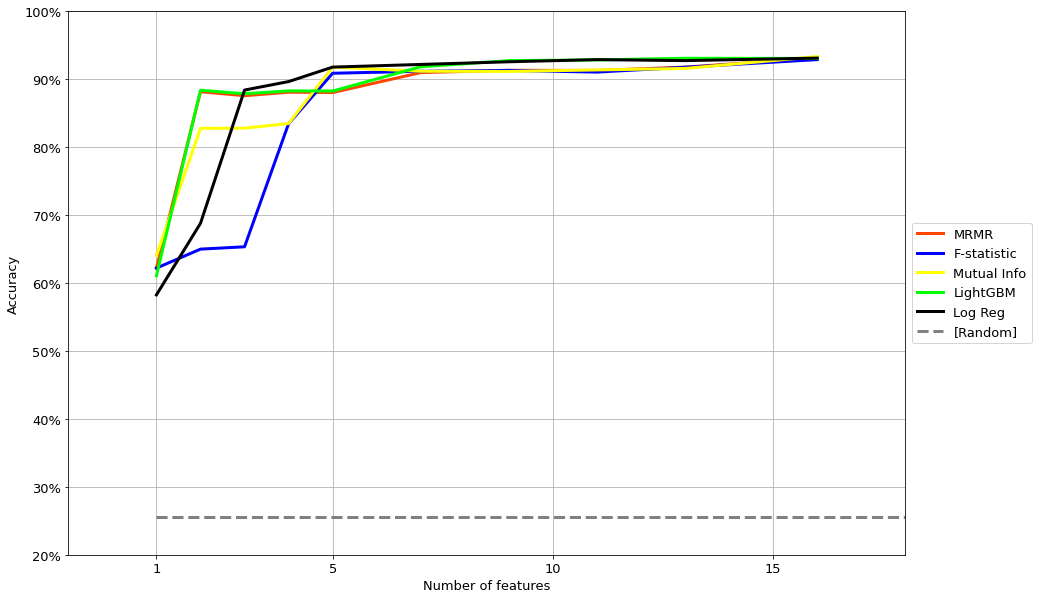

In [29]:
# Set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

# Plot accuracy vs features for each feature selection technique
for algo, label, color in zip(
    ['mrmr', 'f', 'mi', 'lightgbm', 'logreg'],
    ['MRMR', 'F-statistic', 'Mutual Info', 'LightGBM', 'Log Reg'],
    ['orangered', 'blue', 'yellow', 'lime', 'black']):
        plt.plot(accuracy.index, accuracy[algo], label = label, color = color, lw = 3)

plt.plot(
    [1, 20], [pd.Series(y_test).value_counts(normalize = True).iloc[0]] * 2, 
    label = '[Random]', color = 'grey', ls = '--', lw = 3
)

plt.legend(fontsize = 13, loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()
plt.yticks(np.linspace(0, 1, 11), ['{:.0%}'.format(i) for i in np.linspace(0, 1, 11)], fontsize = 13)
plt.xticks([1] + list(range(5, 21, 5)), fontsize = 13)
plt.xlim(-1, 18)
plt.ylim(0.20, 1.00)
plt.xlabel('Number of features', fontsize = 13)
plt.ylabel('Accuracy', fontsize = 13)
plt.savefig('accuracy.png', dpi = 300, bbox_inches = 'tight')

In [30]:
from win32com.client import Dispatch
speak = Dispatch("SAPI.SpVoice").Speak

In [31]:
speak("Feature Comparison Complete.")

1

# More modeling...

## Random Forest

In [99]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier

In [100]:
# Create classifier
classifier = RandomForestClassifier(random_state=42, 
                                    class_weight='balanced', 
                                    n_jobs=-1)

In [101]:
%%time
# Train model
classifier.fit(X_train, y_train)

Wall time: 703 ms


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [102]:
# Get accuracy score
score = round(classifier.score(X_test, y_test)*100, 2)
print(f"Accuracy:\t{score}")

Accuracy:	92.34


### Evaluate

In [103]:
# Load libraries
from sklearn.metrics import classification_report, confusion_matrix

In [104]:
# Get predictions
predictions = classifier.predict(X_test)

#### Confusion matrix

In [105]:
# Print confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[353   0  27   0   2   3  10]
 [  0 161   0   0   0   0   0]
 [ 15   0 448   0   9   1   6]
 [  0   0   0 970   2  17  54]
 [  2   0   9   4 561   0  12]
 [  4   0   0  20   0 581  14]
 [  1   0   1  80   8  12 697]]


#### Classification report

In [106]:
# Print precision, recall, f1-score, and accuracy
cr = classification_report(y_test, predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       395
           1       1.00      1.00      1.00       161
           2       0.92      0.94      0.93       479
           3       0.90      0.93      0.92      1043
           4       0.96      0.95      0.96       588
           5       0.95      0.94      0.94       619
           6       0.88      0.87      0.88       799

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



### Visualize random forest hyperparameters

In [40]:
# Load libraries
from sklearn.model_selection import validation_curve

In [41]:
%%time
# Create a range of values for the parameter
param_range = np.arange(1, 100, 5)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(
    RandomForestClassifier(), # Classifier
    X, # Feature matrix
    y, # Target vector
    param_name="n_estimators", # Hyperparameter to examine
    param_range=param_range, # Range of hyperparameter's values
    cv=3, # Number of folds
    scoring="accuracy", # Performance metric
    n_jobs=-1) # Use all computer cores

Wall time: 1min 47s


In [42]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

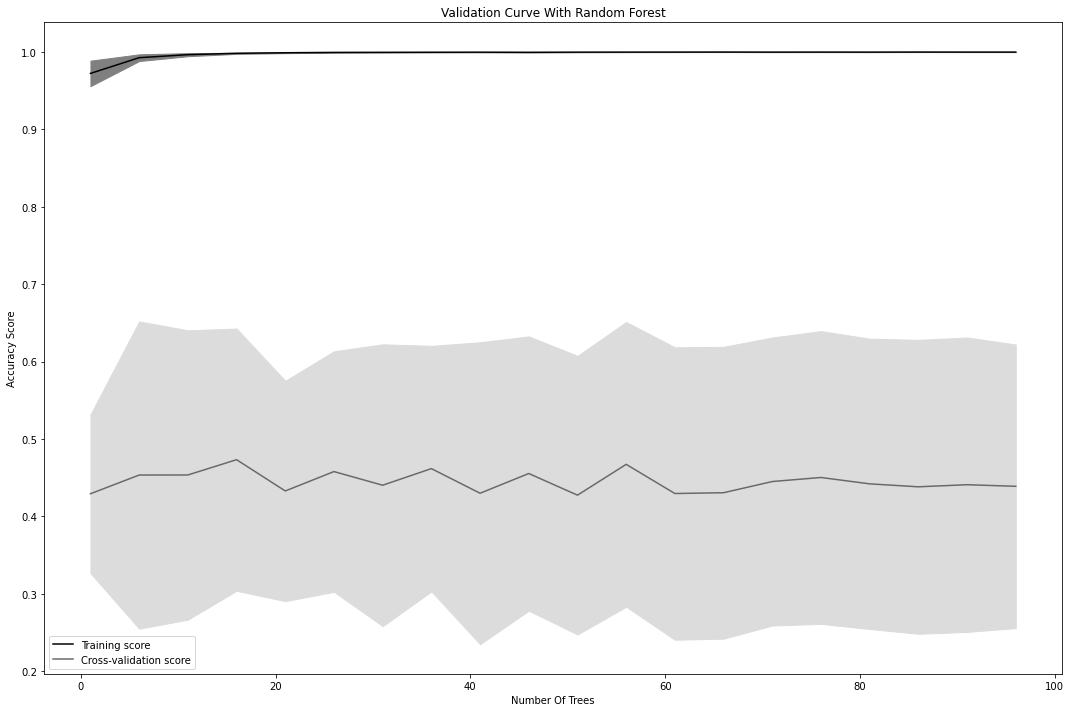

In [43]:
# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accuracy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

### Evaluate

In [44]:
# Load libraries
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
# Get predictions
predictions = classifier.predict(X_test)

#### Confusion matrix

In [46]:
# Print confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[357   0  26   0   1   2   9]
 [  0 161   0   0   0   0   0]
 [ 21   0 445   0   8   2   3]
 [  0   0   0 962   2  16  63]
 [  3   0   9   4 559   0  13]
 [  4   0   0  23   0 580  12]
 [  0   0   2  77  10  12 698]]


#### Classification report

In [47]:
# Print precision, recall, f1-score, and accuracy
cr = classification_report(y_test, predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       395
           1       1.00      1.00      1.00       161
           2       0.92      0.93      0.93       479
           3       0.90      0.92      0.91      1043
           4       0.96      0.95      0.96       588
           5       0.95      0.94      0.94       619
           6       0.87      0.87      0.87       799

    accuracy                           0.92      4084
   macro avg       0.93      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



## Logistic Regression

In [48]:
# Load libraries
from sklearn.linear_model import LogisticRegression

In [49]:
# Create logistic regression
logit = LogisticRegression()

In [50]:
%%time
# Train model
logit.fit(X_train, y_train)

Wall time: 1min 23s


LogisticRegression()

In [51]:
# Get accuracy score
score = round(logit.score(X_test, y_test)*100, 2)
print(f"Accuracy:\t{score}")

Accuracy:	92.26


### Evaluate

In [52]:
# Load libraries
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
# Get predictions
predictions = logit.predict(X_test)

#### Confusion matrix

In [54]:
# Print confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[360   0  22   0   0   2  11]
 [  0 161   0   0   0   0   0]
 [ 19   0 445   0   7   2   6]
 [  0   0   0 941   1  18  83]
 [  3   0   5   5 560   0  15]
 [  9   0   0  10   0 581  19]
 [  1   0   1  57  10  10 720]]


#### Classification report

In [55]:
# Print precision, recall, f1-score, and accuracy
cr = classification_report(y_test, predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       395
           1       1.00      1.00      1.00       161
           2       0.94      0.93      0.93       479
           3       0.93      0.90      0.92      1043
           4       0.97      0.95      0.96       588
           5       0.95      0.94      0.94       619
           6       0.84      0.90      0.87       799

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



## Logistic Regression
### Balanced weights - SLIGHTLY BETTER

In [56]:
# Load libraries
from sklearn.linear_model import LogisticRegression

In [57]:
# Create logistic regression
logit = LogisticRegression(class_weight='balanced', n_jobs=-1)

In [58]:
%%time
# Train model
logit.fit(X_train, y_train)

Wall time: 4.28 s


LogisticRegression(class_weight='balanced', n_jobs=-1)

In [59]:
# Get accuracy score
score = round(logit.score(X_test, y_test)*100, 2)
print(f"Accuracy:\t{score}")

Accuracy:	92.31


### Evaluate

In [60]:
# Load libraries
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
# Get predictions
predictions = logit.predict(X_test)

#### Confusion matrix

In [62]:
# Print confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[369   0  20   0   0   1   5]
 [  0 161   0   0   0   0   0]
 [ 19   0 446   0   7   2   5]
 [  0   0   0 916   1  21 105]
 [  3   0   5   4 564   0  12]
 [  9   0   0   7   0 583  20]
 [  1   0   3  40  11  13 731]]


#### Classification report

In [63]:
# Print precision, recall, f1-score, and accuracy
cr = classification_report(y_test, predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       395
           1       1.00      1.00      1.00       161
           2       0.94      0.93      0.94       479
           3       0.95      0.88      0.91      1043
           4       0.97      0.96      0.96       588
           5       0.94      0.94      0.94       619
           6       0.83      0.91      0.87       799

    accuracy                           0.92      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.92      0.92      4084



## Logistic Regression - Polynomials

In [73]:
# Load libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [76]:
# Create polynomial features x^2 and x^3
polynomial = PolynomialFeatures(degree=3, include_bias=False)
features_polynomial = polynomial.fit_transform(X_train)
feat_test_polynomial = polynomial.transform(X_test)

In [77]:
# Create logistic regression
regression = LogisticRegression(class_weight='balanced', n_jobs=-1)

In [78]:
%%time
# Train model
model = regression.fit(features_polynomial, y_train)

Wall time: 37.1 s


In [81]:
# Get accuracy score
score = round(model.score(feat_test_polynomial, y_test)*100, 2)
print(f"Accuracy:\t{score}")

Accuracy:	93.05


### Evaluate

In [ ]:
# Load libraries
from sklearn.metrics import classification_report, confusion_matrix

In [82]:
# Get predictions
predictions = model.predict(feat_test_polynomial)

#### Confusion matrix

In [83]:
# Print confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[369   0  19   0   1   1   5]
 [  0 161   0   0   0   0   0]
 [ 16   0 453   0   5   2   3]
 [  0   0   0 923   5  20  95]
 [  4   0  10   5 558   0  11]
 [  5   0   0   6   0 595  13]
 [  0   0   2  39   9   8 741]]


#### Classification report

In [84]:
# Print precision, recall, f1-score, and accuracy
cr = classification_report(y_test, predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       395
           1       1.00      1.00      1.00       161
           2       0.94      0.95      0.94       479
           3       0.95      0.88      0.92      1043
           4       0.97      0.95      0.96       588
           5       0.95      0.96      0.96       619
           6       0.85      0.93      0.89       799

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084



## K-means Clustering

In [64]:
# Load libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [65]:
# Scale feature data
X_kmeans = beanDF[beanDF.columns[:-1]]

In [66]:
%%time
# Cluster data using k-means to predict classes
model = KMeans(n_clusters=7, random_state=42).fit(X_kmeans)

Wall time: 13.3 s


In [67]:
# Get predicted classes
target_predicted = model.labels_

In [68]:
%%time
# Evaluate model
silhouette_score(X, target_predicted)

Wall time: 15.8 s


0.5333505356677296

## Decision Tree

NOTE: Used Regressor, should have used Classifier

In [85]:
# Load libraries
from sklearn.tree import DecisionTreeRegressor

In [87]:
# Create decision tree regressor object
decisiontree = DecisionTreeRegressor(random_state=42)

In [88]:
%%time
# Train model
decisiontree.fit(X_train, y_train)

Wall time: 611 ms


DecisionTreeRegressor(random_state=42)

In [89]:
# Get accuracy score
score = round(decisiontree.score(X_test, y_test)*100, 2)
print(f"Accuracy:\t{score}")

Accuracy:	75.39


### Evaluate

In [36]:
# Load libraries
from sklearn.metrics import classification_report, confusion_matrix

In [90]:
# Get predictions
predictions = decisiontree.predict(X_test)

#### Confusion matrix

In [91]:
# Print confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[358   0  21   1   2   4   9]
 [  0 161   0   0   0   0   0]
 [ 31   0 433   0  12   1   2]
 [  1   0   0 933   2  21  86]
 [  9   0  15   5 544   0  15]
 [  9   0   2  19   1 565  23]
 [  6   0   3  87  17  16 670]]


#### Classification report

In [92]:
# Print precision, recall, f1-score, and accuracy
cr = classification_report(y_test, predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       395
           1       1.00      1.00      1.00       161
           2       0.91      0.90      0.91       479
           3       0.89      0.89      0.89      1043
           4       0.94      0.93      0.93       588
           5       0.93      0.91      0.92       619
           6       0.83      0.84      0.84       799

    accuracy                           0.90      4084
   macro avg       0.91      0.91      0.91      4084
weighted avg       0.90      0.90      0.90      4084



## Ada Boost

In [108]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Create classifier
adaboost = AdaBoostClassifier(random_state=42)

In [110]:
%%time
# Train model
adaboost.fit(X_train, y_train)

Wall time: 1.07 s


AdaBoostClassifier(random_state=42)

In [111]:
# Get accuracy score
score = round(adaboost.score(X_test, y_test)*100, 2)
print(f"Accuracy:\t{score}")

Accuracy:	64.67


Not sure why this is so low when the classification report shows accuracy to be higher

### Evaluate

In [36]:
# Load libraries
from sklearn.metrics import classification_report, confusion_matrix

In [112]:
# Get predictions
predictions = classifier.predict(X_test)

#### Confusion matrix

In [113]:
# Print confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[353   0  27   0   2   3  10]
 [  0 161   0   0   0   0   0]
 [ 15   0 448   0   9   1   6]
 [  0   0   0 970   2  17  54]
 [  2   0   9   4 561   0  12]
 [  4   0   0  20   0 581  14]
 [  1   0   1  80   8  12 697]]


#### Classification report

In [98]:
# Print precision, recall, f1-score, and accuracy
cr = classification_report(y_test, predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       395
           1       1.00      1.00      1.00       161
           2       0.92      0.94      0.93       479
           3       0.90      0.93      0.92      1043
           4       0.96      0.95      0.96       588
           5       0.95      0.94      0.94       619
           6       0.88      0.87      0.88       799

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



In [64]:
import random as rd

In [65]:
rd.randint(10,100)

84

In [66]:
3*4*3*2*3

216

In [68]:
from scipy.stats import uniform

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [77]:
uniform(loc=0, scale=0.0005).rvs()

0.00023606421293931846

In [78]:
5*2*2*5*2

200

In [192]:
print('Best parameters found:\n', rand_result.best_params_)

Best parameters found:
 {'activation': 'identity', 'alpha': 0.00030919300466654366, 'early_stopping': True, 'hidden_layer_sizes': (77, 73, 54), 'learning_rate': 'constant', 'solver': 'lbfgs'}


In [215]:
print('Best parameters found:\n', rand_result.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.00025131854655259604, 'early_stopping': True, 'hidden_layer_sizes': (67, 52, 75), 'learning_rate': 'constant', 'solver': 'adam'}


In [227]:
print('Best parameters found:\n', rand_result.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001865613092111918, 'early_stopping': True, 'hidden_layer_sizes': (66, 95, 70), 'learning_rate': 'invscaling', 'solver': 'adam'}


In [265]:
print('Best parameters found:\n', rand_result.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.00012435713629381495, 'early_stopping': True, 'hidden_layer_sizes': (44, 73, 61), 'learning_rate': 'invscaling', 'solver': 'adam'}
